# NOVATEC.PY - HACKATHON SIC 2022-23

## Chatbot - PUGS 2.0

In [1]:
import pickle
import nltk
import json
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model
from nltk.stem import SnowballStemmer
import random


In [2]:
def guardar_json(datos):
    archivo = open("intenciones.json", "w")
    json.dump(datos, archivo, indent = 4)

In [3]:
biblioteca = {"intenciones":
              [
                  {"etiqueta":"saludos",
                   "patrones":["hola",
                               "hey",
                               "buenas",
                               "buenos dias",
                               "buenas noches",
                               "buenas tardes",
                               "hay alguien ahi?",
                               "que tal?"
                               "saludos",
                               "como estas?"
                              ],
                   "respuestas":["GUAU GUAU!, me llamo PUGS! su sistema de ayuda para atencion en sus preguntas o dudas sobre el centro de atencion para su(s) mascota(s). En que te puedo ayudar?"],
                   "contexto":[""]
                },
                  
                {"etiqueta":"despedidas",
                 "patrones":["adios",
                             "hasta luego",
                             "hasta pronto",
                             "hasta la proxima",
                             "chao",
                             "bye",
                             "nos vemos"
                             ],
                 "respuestas":["Gracias por consultarme humano!! Hasta Pronto :)",
                               "Hasta la proxima! Nos vemos!",
                               "Adios, espero haberte ayudado humano :)"],
                 "contexto":[""]
                },
                  
                  {"etiqueta":"agradecimientos",
                   "patrones":["gracias",
                               "gracias por tu ayuda",
                               "muchas gracias",
                               "gracias por tu tiempo",
                               "te lo agradezco",
                               "has sido de gran ayuda",
                               "mil gracias",
                               "genial",
                               "excelente",
                               "brutal",
                               "muy amable"
                              ],
                   "respuestas":["Espero haberte ayudado, eres un humano genial!!",
                                "De nada, estoy para ayudarte!",
                                "Ha sido todo un placer humano!",
                                "Gracias a usted por elegirnos!"],
                   "contexto":[""]         
                  },
                  
                  {"etiqueta":"servicios",
                   "patrones":["servicios",
                               "que servicios ofrecen?",
                               "de que servicios disponen?",
                               "realizan laboratorios?",
                               "realizan endoscopia?",
                               "medicina preventiva",
                               "medicina general",
                               "medicina especializada",
                               "ofrecen cirugias especializadas?",
                               "ofrecen cirugia general?",
                               "tienen servicios de acupuntura?",
                               "servicos de cardiograma",
                               "hacen ultrasonidos?",
                               "realizan electrocardiogramas?",
                               "hacen rayos x?",
                               "ofrecen servicios de urgencia?",
                               "que hacen?"
                              ],
                   "respuestas":["Ofrecemos los siguientes servicios:\n-Medicina Preventiva\n-Medicina General\n -Medicina Especializada\n -Cirugia General\n -Cirugias Especializadas\n -Acupuntura\n -Cardiogramas\n -Ultrasonidos\n -Electrocardiograma\n -Rayos X\n -Endoscopia\n -Laboratorios\n -Urgencia"],
                   "contexto":[""]         
                  },
                  
                  {"etiqueta":"horarios",
                   "patrones":["horario",
                               "que horario tienen?",
                               "a que hora atienden?",
                               "cual es su horario de atencion?",
                               "estan disponibles?",
                               "estan abiertos?",
                               "estan cerrados?",
                               "que dia atienden?",
                               "atienden?"
                              ],
                   "respuestas":["Estamos abiertos de Lunes a Sabados de 6:00 a.m - 10:00 p.m y los Domingos de 6:00 a.m - 7:00 p.m"],
                   "contexto":[""]         
                  },
                  
                  {"etiqueta":"ubicacion",
                   "patrones":["ubicacion",
                               "donde se encuentran ubicados?",
                               "en donde estan localizados?",
                               "Donde estan?",
                               "Donde los puedo encontrar?",
                               "Como puedo llegar?",
                               "podrian enviar la ubicacion?",
                               "localizacion",
                               "en que parte se encuentran ubicados?"
                              ],
                   "respuestas":["Nos encontramos ubicados en Chanis, Campo Limbergh, Casa H-49, Ciudad de Panama, Panama\n En el siguiente link se muestra la ubicacion exacta: https://goo.gl/maps/tacZVtLWV5ENFv6W7"],
                   "contexto":[""]         
                  },
                  
                  {"etiqueta":"contacto",
                   "patrones":["contacto",
                               "como los puedo contactar?",
                               "tiene algun numero de contacto?",
                               "tienen whatsapp?",
                               "tienen instagram?",
                               "tienen algun numero de telefono?"
                              ],
                   "respuestas":["Puedes contactarte directamente con nosotros al Whatsapp: +507 62840188 o a nuestro numero telefónico: 391-8357 / 391-8358\n Tambien nos puedes seguir en nuestro Instagram para no perderte de ninguna promocion!!: https://www.instagram.com/clinicavetpatasyhuellas/?hl=es"],
                   "contexto":[""]         
                  },
                  
                  {"etiqueta":"sinrespuesta",
                   "patrones":[""],
                   "respuestas":["no se ha detectado respuesta. Puedes hacerme preguntas como:\nHorario \nServicios \nUbicacion \nContacto",
                                 "ouh, no comprendo lo que me quieres decir humano :(. Puedes hacerme preguntas como:\nHorario \nServicios \nUbicacion \nContacto",
                                 "lo siento, podrias decirlo de otro manera?, a veces me cuesta entender a los humanos. Puedes hacerme preguntas como:\nHorario \nServicios \nUbicacion \nContacto"],
                   "contexto":[""]
                  }
              ]
    
            }

guardar_json(biblioteca)

In [4]:
palabras_ignoradas = ["?", "¿", "!", "¡", ",", ".", "|", "°", "*"]
archivo_json = open("intenciones.json").read()
intenciones = json.loads(archivo_json)

In [5]:
palabras = []
categorias = []
documentos = []

for intencion in intenciones["intenciones"]:
    for patron in intencion["patrones"]:
        w_token = nltk.word_tokenize(patron)
        palabras.extend(w_token)
        
        
        documentos.append((w_token, intencion["etiqueta"]))
        
        if intencion["etiqueta"] not in categorias:
            categorias.append(intencion["etiqueta"])
            

In [6]:
lematizar = SnowballStemmer('spanish')
palabras = [lematizar.stem(pal.lower()) for pal in palabras if pal not in palabras_ignoradas]

pickle.dump(palabras, open("palabras.pkl", "wb"))
pickle.dump(categorias, open("categorias.pkl", "wb"))

In [7]:
pickle.dump(palabras, open("palabras.pkl", "wb"))
pickle.dump(categorias, open("categorias.pkl", "wb"))

In [8]:
entrenamiento=[]
output_empty=[0]*len(categorias)

for doc in documentos:
    contenedor=[]
    patrones_pal=doc[0]
    patrones_pal=[lematizar.stem(palabra.lower()) for palabra in patrones_pal if palabra not in palabras_ignoradas ]
    
    for palabra in palabras:
        contenedor.append(1) if palabra in patrones_pal else contenedor.append(0)
        
    output_row=list(output_empty)
    output_row[categorias.index(doc[1])] = 1
    
    entrenamiento.append([contenedor, output_row])
    
entrenamiento=np.array(entrenamiento)
x_train = list(entrenamiento[:,0])
y_train = list(entrenamiento[:,1])

C:\Users\psthe\AppData\Local\Temp\ipykernel_8136\1803794437.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  entrenamiento=np.array(entrenamiento)


In [9]:
modelo = Sequential()

modelo.add(Dense(128, input_shape=(len(x_train[0]),), activation='relu')) 
modelo.add(Dropout(0.5))
modelo.add(Dense(64,activation='relu')) 
modelo.add(Dropout(0.5))
modelo.add(Dense(len(y_train[0]),activation='softmax'))

sgd=SGD(learning_rate=0.01,decay=1e-6,momentum=0.9,nesterov=True) 

modelo.compile(loss="categorical_crossentropy",optimizer=sgd,metrics=["accuracy"])

hist=modelo.fit(np.array(x_train),np.array(y_train),epochs=300,batch_size=5,verbose=1)
modelo.save("modelo_chatbot_pugs.h5",hist)
print("modelo creado")

#print("###############MODELO CREADO####################")
#reemplazar los nombres de la extensiones si es necesario


Epoch 1/300
14/14 [==============================] - 1s 2ms/step - loss: 2.1071 - accuracy: 0.2029
Epoch 2/300
14/14 [==============================] - 0s 3ms/step - loss: 1.9609 - accuracy: 0.2174
Epoch 3/300
14/14 [==============================] - 0s 2ms/step - loss: 1.7660 - accuracy: 0.3768
Epoch 4/300
14/14 [==============================] - 0s 2ms/step - loss: 1.6769 - accuracy: 0.3768
Epoch 5/300
14/14 [==============================] - 0s 3ms/step - loss: 1.4768 - accuracy: 0.4348
Epoch 6/300
14/14 [==============================] - 0s 3ms/step - loss: 1.3038 - accuracy: 0.5507
Epoch 7/300
14/14 [==============================] - 0s 2ms/step - loss: 1.2199 - accuracy: 0.6957
Epoch 8/300
14/14 [==============================] - 0s 2ms/step - loss: 1.0846 - accuracy: 0.6667
Epoch 9/300
14/14 [==============================] - 0s 2ms/step - loss: 0.9872 - accuracy: 0.7536
Epoch 10/300
14/14 [==============================] - 0s 2ms/step - loss: 0.8590 - accuracy: 0.7681
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0503 - accuracy: 0.9855
Epoch 84/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9855
Epoch 85/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0910 - accuracy: 0.9710
Epoch 86/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0657 - accuracy: 0.9855
Epoch 87/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9855
Epoch 88/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9855
Epoch 89/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0669 - accuracy: 0.9855
Epoch 90/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0568 - accuracy: 1.0000
Epoch 91/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.9855
Epoch 92/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0911 - accuracy: 0.9855
Epoch 93/300


14/14 [==============================] - 0s 2ms/step - loss: 0.0259 - accuracy: 1.0000
Epoch 165/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0378 - accuracy: 1.0000
Epoch 166/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 1.0000
Epoch 167/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 1.0000
Epoch 168/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 1.0000
Epoch 169/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0768 - accuracy: 0.9855
Epoch 170/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0598 - accuracy: 0.9855
Epoch 171/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9855
Epoch 172/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9855
Epoch 173/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9855
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 246/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0177 - accuracy: 1.0000
Epoch 247/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0326 - accuracy: 0.9855
Epoch 248/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 1.0000
Epoch 249/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0264 - accuracy: 0.9855
Epoch 250/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0093 - accuracy: 1.0000
Epoch 251/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0226 - accuracy: 0.9855
Epoch 252/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 1.0000
Epoch 253/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 1.0000
Epoch 254/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000
Epoc

In [10]:
modelo=load_model("modelo_chatbot_pugs.h5")
intentos= json.loads(open("intenciones.json").read())
palabras = pickle.load(open("palabras.pkl","rb"))
classes = pickle.load(open("categorias.pkl","rb"))

In [11]:
def limpiar_conversacion(sentence):
    sentence_words=nltk.word_tokenize(sentence)
    sentence_words=sentence_words=[lematizar.stem(palabras.lower()) for palabras in sentence_words] 
    return sentence_words

def bow (sentence,palabras,show_details=True): 
    sentence_words=limpiar_conversacion(sentence)
    
    contenedor=[0]*len(palabras)
    
    for i in sentence_words:
        for j,w in enumerate(palabras):
            if w==i: 
                contenedor[j]=1
                if show_details:
                    print("encontrado: ",w)
    return (np.array(contenedor))

def predict_class(sentence,model):
    p = bow(sentence,palabras,show_details=False) 
    res = model.predict(np.array([p]))[0] 
    
    ERROR_THRESHOLD=0.25
    results= [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD] 
    results.sort(key=lambda x: x[1], reverse=True) 
    
    return_list = []    
    for r in results:   
        return_list.append({"intent": categorias[r[0]], "probability": str(r[1])})   
    print("print de return list: ", return_list) 
    return return_list



def get_response(ints,intenciones_json):
    tag= ints[0]["intent"]
    list_of_intents=intenciones_json["intenciones"] 
    
    for i  in list_of_intents: 
        if (i["etiqueta"]==tag):
            result= random.choice(i["respuestas"]) 
            break
    return result

def chatbot_response(text): 
    ints=predict_class(text,modelo) 
    res=get_response(ints,intenciones)
    return res

In [12]:
##Prueba
texto_us=""
print(" bienvenido, para salir escriba *listo*")
while texto_us!="listo":
    texto_us=input()
    res=chatbot_response(texto_us)
    print(res)

 bienvenido, para salir escriba *listo*
listo
1/1 [==============================] - 0s 94ms/step
print de return list:  [{'intent': 'sinrespuesta', 'probability': '0.9100302'}]
no se ha detectado respuesta. Puedes hacerme preguntas como:
Horario 
Servicios 
Ubicacion 
Contacto


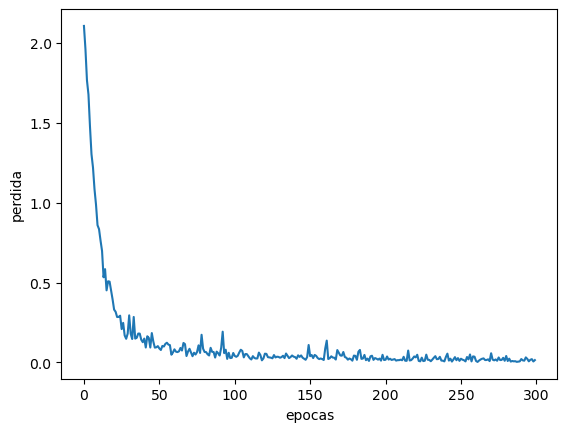

In [13]:
import matplotlib.pyplot as plt
plt.xlabel("epocas")
plt.ylabel("perdida")
plt.plot(hist.history["loss"])


In [14]:
modelo.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               22016     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
Total params: 30,792
Trainable params: 30,792
Non-trainable params: 0
_________________________________________________________________


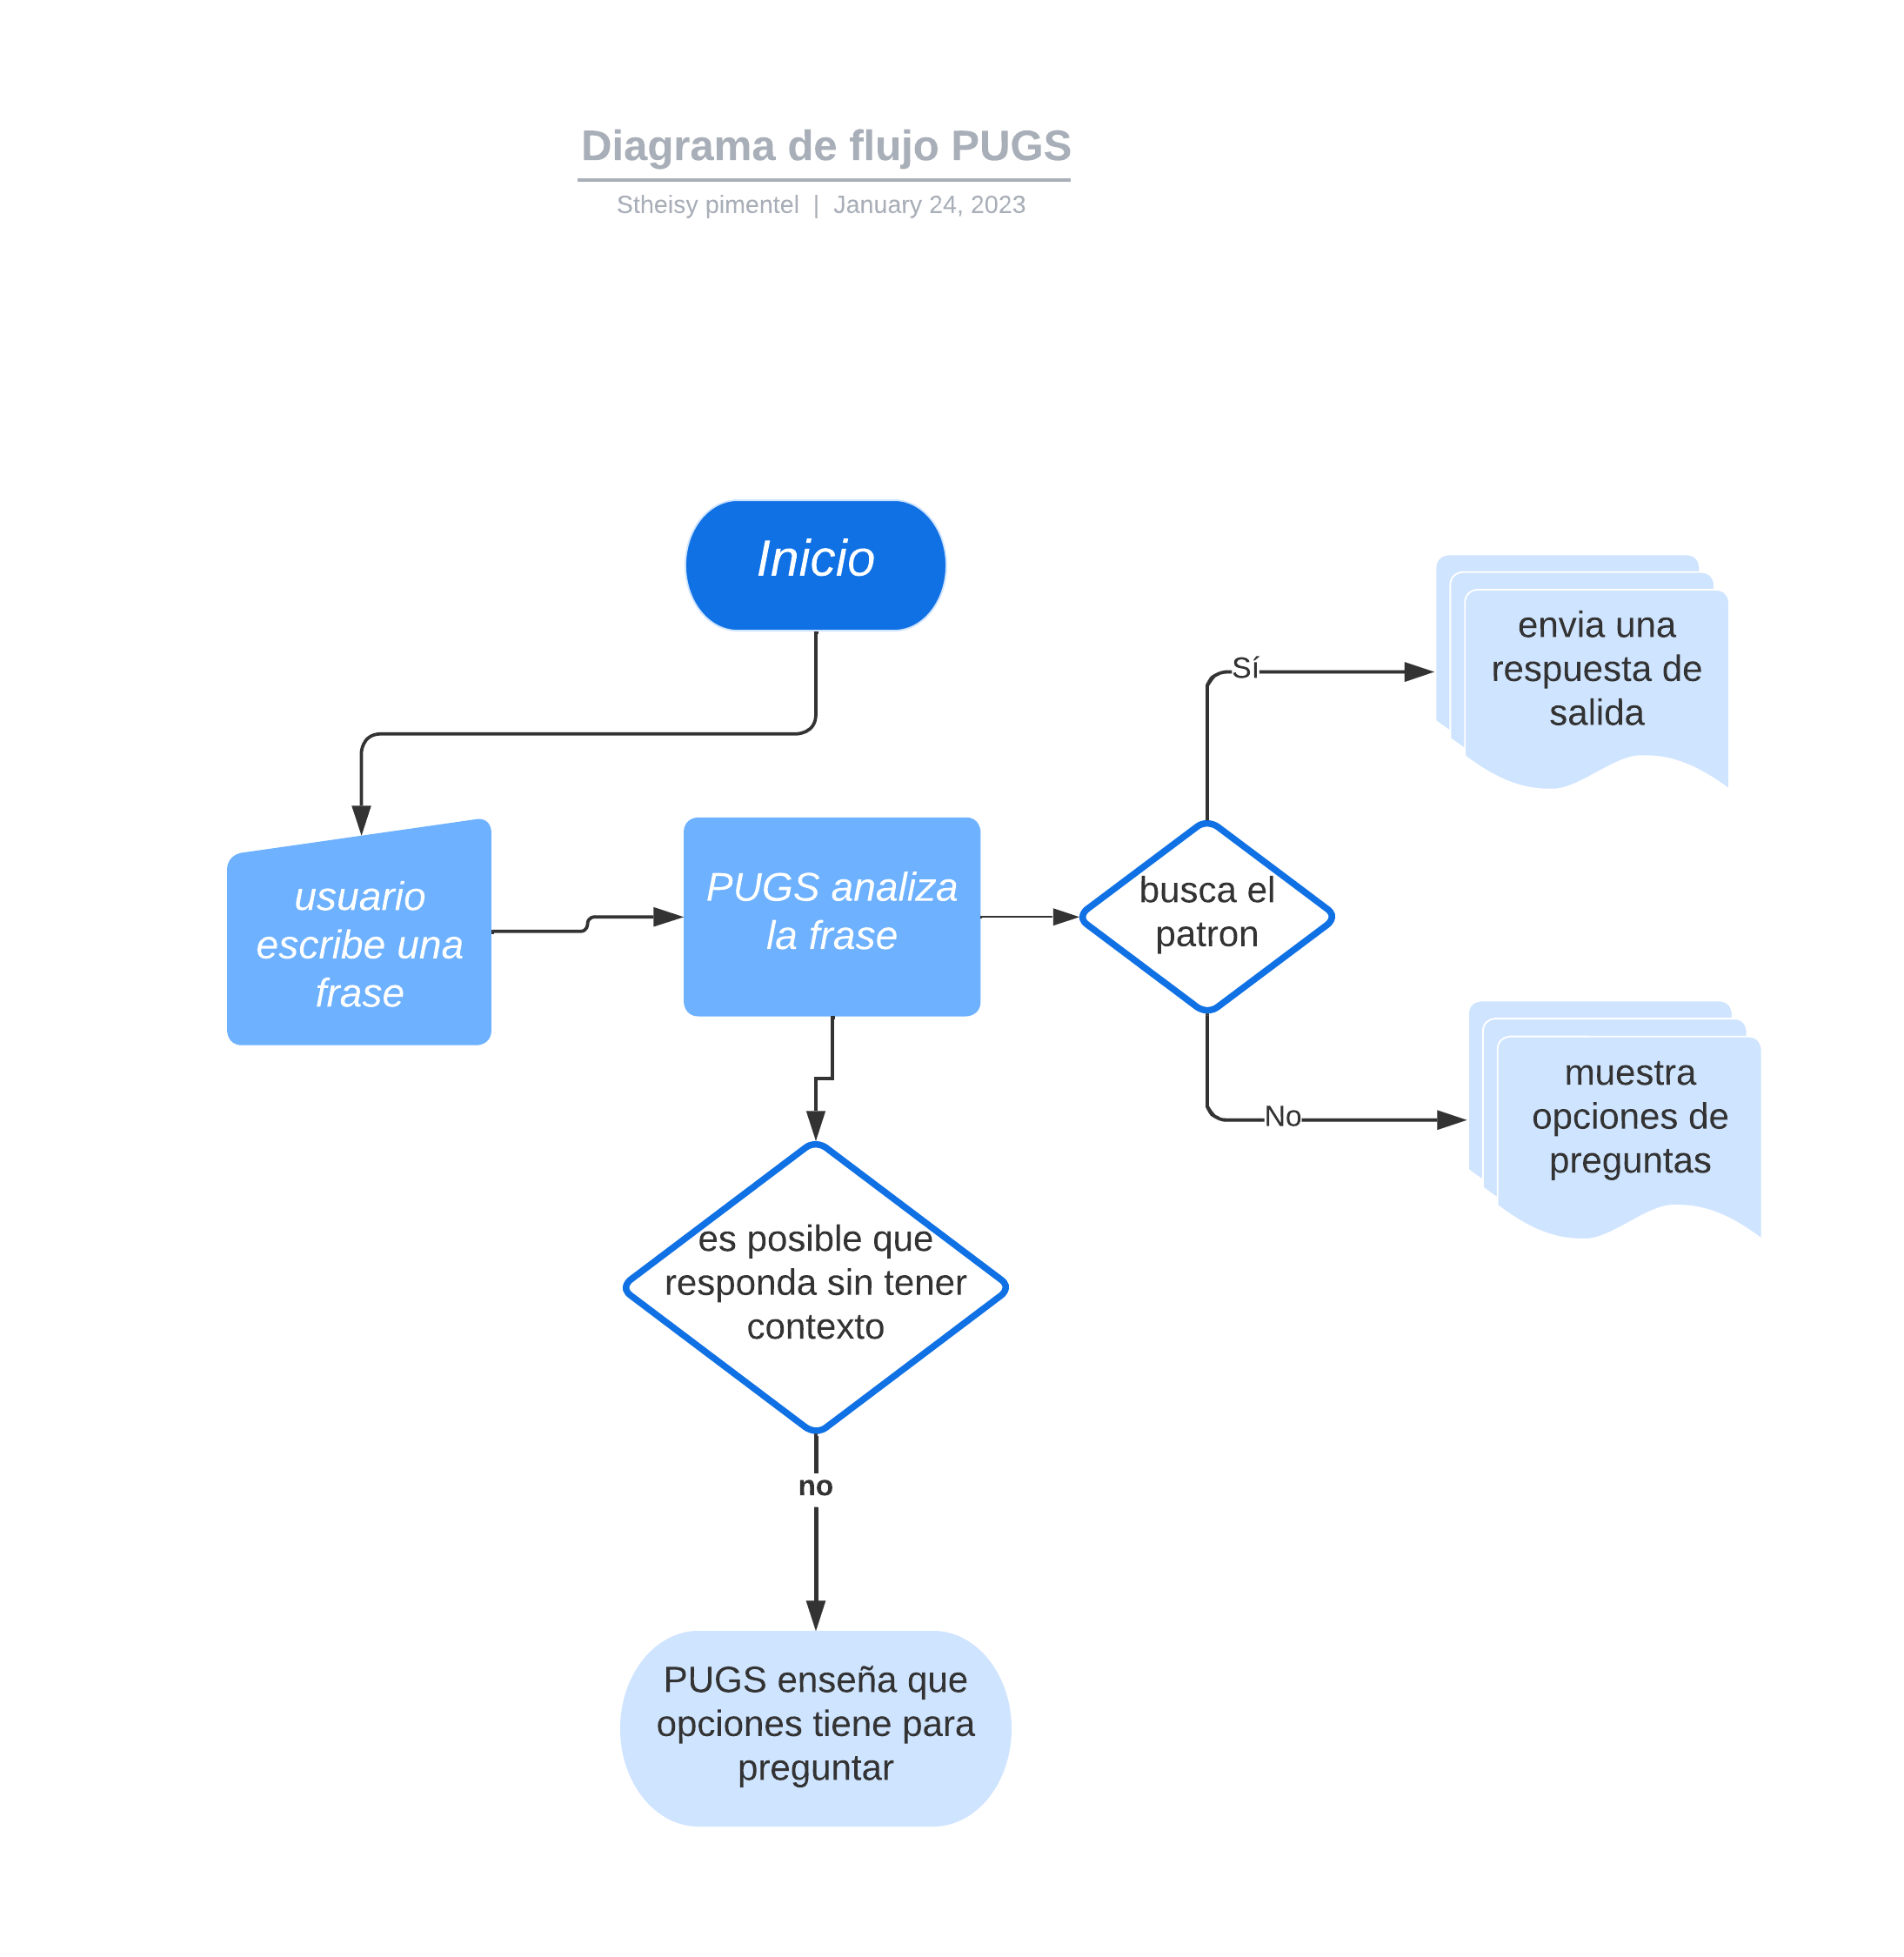

